# __Supervised Machine Learning with KNN Classifier__ <img src="https://www.cdcs.ed.ac.uk/files/styles/large_16x9/public/2019-08/Spotlighton_AjaMurray_A4_UKHLS_Logo_positive_RGB_300dpi.jpg?itok=YmQnr_oq" align="right" width="300" height="300" >
---
#### Access from UK Data Service 
##### [Understanding Society: COVID-19 Study November 2020](https://www.understandingsociety.ac.uk/)
---

## Python libraries

In [1]:
import sklearn
import pandas as pd
import numpy as np

# Data analysis & visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the dataset 
UnderstandSocietyCovid = pd.read_csv("UnderstandingSocietyCovidNov2020.csv")

In [3]:
pd.options.display.max_columns = None
UnderstandSocietyCovid.head()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,i_hidp,j_hidp,k_hidp,i_ioutcome,j_ioutcome,k_ioutcome,cf_welsh,cf_dobchk,cf_age,cf_sex_cv,cf_addrchk,cf_couplewsh,cf_hhnum,cf_personsexa,cf_personsexb,cf_personsexc,cf_personsexd,cf_personsexe,cf_personsexf,cf_personsexg,cf_personsexh,cf_personsexi,cf_personsexj,cf_personsexk,cf_personagea,cf_personageb,cf_personagec,cf_personaged,cf_personagee,cf_personagef,cf_personageg,cf_personageh,cf_personagei,cf_personagej,cf_personagek,cf_relationa,cf_relationb,cf_relationc,cf_relationd,cf_relatione,cf_relationf,cf_relationg,cf_relationh,cf_relationi,cf_relationj,cf_relationk,cf_couple,cf_hhcompa,cf_hhcompb,cf_hhcompc,cf_hhcompd,cf_hhcompe,cf_parent0plus,cf_parent5plus,cf_parent015,cf_parent1619,cf_parent511,cf_parent1217,cf_parent418,cf_scsf1,cf_ff_hadsymp,cf_clinvuln_dv,cf_hadsymp,cf_hassymp,cf_symptoms1,cf_symptoms2,cf_symptoms23,cf_symptoms24,cf_symptoms25,cf_symptoms3,cf_symptoms4,cf_symptoms5,cf_symptoms6,cf_symptoms7,cf_symptoms8,cf_symptoms9,cf_symptoms10,cf_symptoms12,cf_symptoms13,cf_symptoms14,cf_symptoms15,cf_symptoms16,cf_symptoms17,cf_symptoms18,cf_symptoms19,cf_symptoms20,cf_symptoms21,cf_symptoms22,cf_symptoms11,cf_cv19treat,cf_cv19trwhat1,cf_cv19trwhat2,cf_cv19trwhat3,cf_cv19trwhat4,cf_cv19trwhat5,cf_cv19trwhat6,cf_cv19trwhat7,cf_cv19trwhat8,cf_cv19trwhat9,cf_cv19trwhat10,cf_cv19trwhat11,cf_longcovid,cf_lgcvsymp1,cf_lgcvsymp23,cf_lgcvsymp24,cf_lgcvsymp25,cf_lgcvsymp3,cf_lgcvsymp4,cf_lgcvsymp5,cf_lgcvsymp6,cf_lgcvsymp7,cf_lgcvsymp8,cf_lgcvsymp9,cf_lgcvsymp10,cf_lgcvsymp12,cf_lgcvsymp13,cf_lgcvsymp14,cf_lgcvsymp15,cf_lgcvsymp16,cf_lgcvsymp17,cf_lgcvsymp18,cf_lgcvsymp19,cf_lgcvsymp20,cf_lgcvsymp21,cf_lgcvsymp22,cf_lgcvsymp26,cf_lgcvsymp_oth,cf_tested,cf_testresult,cf_testwhen_d,cf_testwhen_m,cf_testwhen_y,cf_hadcovid,cf_testtrace,cf_traceinfo,cf_traceinfoeng,cf_traced,cf_contactcv19t1,cf_contactcv19t5,cf_contactcv19t2,cf_contactcv19t3,cf_contactcv19t4,cf_riskcv19,cf_smartphone,cf_smarttype,cf_smartmodel,cf_covidapp,cf_whynotapp1,cf_whynotapp2,cf_whynotapp3,cf_whynotapp4,cf_whynotapp5,cf_whynotapp6,cf_whynotapp7,cf_whynotapp8,cf_whynotapp9,cf_whynotapp10,cf_whynotapp11,cf_whynotapp_oth,cf_whynotapporder,cf_covidappon,cf_covidappnot1,cf_covidappnot2,cf_covidappnot3,cf_covidappnot_oth,cf_hhsymp,cf_hhsympwho_persona,cf_hhsympwho_personb,cf_hhsympwho_personc,cf_hhsympwho_persond,cf_hhsympwho_persone,cf_hhsympwho_personf,cf_hhsympwho_persong,cf_hhsympwho_personh,cf_hhsympwho_personi,cf_hhsympwho_personj,cf_hhsympwho_personk,cf_hhsympwho_personl,cf_hhsympwho_personm,cf_hhsympwho_personn,cf_hhsympwho_persono,cf_hhsympwho_personp,cf_hhsympwho_personq,cf_hhsympwho_personr,cf_hhsympwho_persons,cf_hhsympwho_persont,cf_hhsympwho_personu,cf_hhsympwho_personv,cf_hhsympwho_personw,cf_hhsympwho_personx,cf_hhsympwho_persony,cf_hhsympwho_none,cf_hhtest,cf_hhtestwho_persona,cf_hhtestwho_personb,cf_hhtestwho_personc,cf_hhtestwho_persond,cf_hhtestwho_persone,cf_hhtestwho_personf,cf_hhtestwho_persong,cf_hhtestwho_personh,cf_hhtestwho_personi,cf_hhtestwho_personj,cf_hhtestwho_personk,cf_hhtestwho_personl,cf_hhtestwho_personm,cf_hhtestwho_personn,cf_hhtestwho_persono,cf_hhtestwho_personp,cf_hhtestwho_personq,cf_hhtestwho_personr,cf_hhtestwho_persons,cf_hhtestwho_persont,cf_hhtestwho_personu,cf_hhtestwho_personv,cf_hhtestwho_personw,cf_hhtestwho_personx,cf_hhtestwho_persony,cf_hhtestwho_none,cf_hhresult_persona,cf_hhresult_personb,cf_hhresult_personc,cf_hhresult_persond,cf_hhresult_persone,cf_hhresult_personf,cf_hhresult_persong,cf_hhresult_personh,cf_hhresult_personi,cf_hhresult_personj,cf_hhresult_personk,cf_hhresult_personl,cf_hhresult_personm,cf_hhresult_personn,cf_hhresult_persono,cf_hhresult_personp,cf_hhresult_personq,cf_hhresult_personr,cf_hhresult_persons,cf_hhresult_persont,cf_hhresult_personu,cf_hhresult_personv,cf_hhresult_personw,cf_hhresult_personx,cf_hhresult_persony,cf_hhtestwhen_d_persona,cf_hhtestwhen_m_persona,cf_hhtestwhen_y_persona,cf_hhtestwhen_d_personb,cf_hhtestwhen_m_personb,cf_hh

## Outcome and predictive features  
#### Outcome: Output _(Y)_

|Description| Variable| Values
| ---| ---|---|
|Likelihood of taking up a coronavirus vaccination | cf_vaxxer | 1 = Very likely, 2 = Likely, 3 = Unlikely, 4 = Very unlikely

#### Predictors: Input features _(X)_

|Description| Variable| Values
| ---| ---|---|
|Age | cf_age | Integer values (whole numbers)
| Respondent sex | cf_sex_cv | 1 = Male, 2 = Female, 3 = Prefer not to say
| General health | cf_scsf1 | 1 = Excelent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor 
| At risk of serious illness from COVID-19 | cf_clinvuln_dv | 0 = no risk (not clinically vulnerable), 1 = moderate risk (clinically vulnerable), 2 = high risk (clinically extremely vulnerable)
| People in this neighbourhood can be trusted | cf_nbrcoh3 | 1 = Strongly agree, 2 = Agree, 3 = Neither agree nor disagree, 4 = Disagree, 5 = Strongly disagree


---

## Exploratory data analysis

In [4]:
#We select the desire variables to explor
USocietyCovid = UnderstandSocietyCovid[['cf_vaxxer', 'cf_age','cf_sex_cv','cf_scsf1', 'cf_clinvuln_dv','cf_nbrcoh3']]
USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,2,37,2,2,0,3
1,3,35,1,4,0,4
2,3,55,2,2,0,3
3,1,38,1,3,1,2
4,1,67,2,2,0,3
...,...,...,...,...,...,...
12030,1,57,1,2,0,2
12031,2,70,2,3,1,3
12032,2,64,1,2,0,3
12033,4,31,1,1,0,-8


In [5]:
#It's used the 'mask' function in pandas to replace values with NaN where a condition is met.
#This step is necessary to avoid missing values or invalid values
USocietyCovid = USocietyCovid.mask(USocietyCovid < 0)
USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,2.0,37,2,2.0,0.0,3.0
1,3.0,35,1,4.0,0.0,4.0
2,3.0,55,2,2.0,0.0,3.0
3,1.0,38,1,3.0,1.0,2.0
4,1.0,67,2,2.0,0.0,3.0
...,...,...,...,...,...,...
12030,1.0,57,1,2.0,0.0,2.0
12031,2.0,70,2,3.0,1.0,3.0
12032,2.0,64,1,2.0,0.0,3.0
12033,4.0,31,1,1.0,0.0,NaN


In [6]:
#Remove the NaN values so we only keep the meaningful responses
USocietyCovid = USocietyCovid[['cf_vaxxer', 'cf_age','cf_sex_cv','cf_scsf1', 'cf_clinvuln_dv','cf_nbrcoh3']].dropna()
USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,2.0,37,2,2.0,0.0,3.0
1,3.0,35,1,4.0,0.0,4.0
2,3.0,55,2,2.0,0.0,3.0
3,1.0,38,1,3.0,1.0,2.0
4,1.0,67,2,2.0,0.0,3.0
...,...,...,...,...,...,...
12029,2.0,41,1,3.0,0.0,3.0
12030,1.0,57,1,2.0,0.0,2.0
12031,2.0,70,2,3.0,1.0,3.0
12032,2.0,64,1,2.0,0.0,3.0


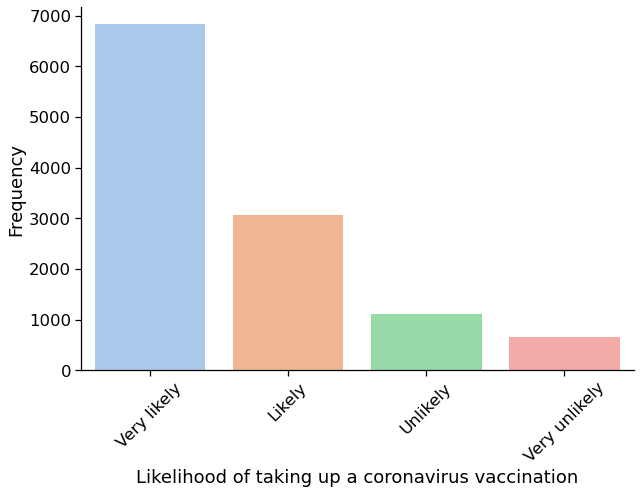

In [7]:
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

fig = sns.catplot(x="cf_vaxxer", 
            kind = "count",
            height=6, aspect=1.5, palette="pastel",
            data = USocietyCovid)

# Tweak the plot 
(fig.set_axis_labels("Likelihood of taking up a coronavirus vaccination", "Frequency")
    .set_xticklabels(["Very likely","Likely","Unlikely","Very unlikely"])
    .set_xticklabels(rotation=45))

#### __Frequency distribution of variable (Likelihood of taking up a coronavirus vaccination)__

__Questionarie:__ Imagine that a vaccine against COVID-19 was available for anyone who wanted it.
How likely or unlikely would you be to take the vaccine?

The graphs above show us that most of the population are inclined to be `very likely` to take coronavirus vaccine, the other half is `likely` to take the vaccine and small minority of people that are `unlikely` and `very unlikely` to take the vaccine.

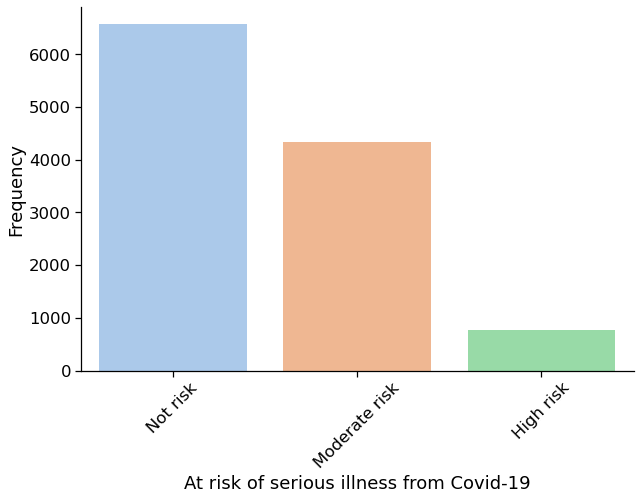

In [8]:
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

fig = sns.catplot(x="cf_clinvuln_dv", 
            kind = "count",
            height=6, aspect=1.5, palette="pastel",
            data = USocietyCovid)

# Tweak the plot 
(fig.set_axis_labels("At risk of serious illness from Covid-19", "Frequency")
    .set_xticklabels(["Not risk","Moderate risk","High risk"])
    .set_xticklabels(rotation=45))

#### __Frequency distribution of variable (At risk of serious illness from Covid-19)__

The graphs above shows the frequency distribution of people that have a risk of serious illness from Covid-19. Most of the values shows a `Not risk` of serious illness from Covid-19, considerably high number of people with a `Moderate risk` and a less than 1000 responses with a `High risk`.

---

## Preparing variables for your machine leaning modelling
Recode `cf_vaxxer` into a binary variable by merging each side of the likert scale:

|Description| Variable| Values
| ---| ---|---|
|Likelihood of taking up a coronavirus vaccination | cf_vaxxer | 1 = Very likely, 2 = Likely, 3 = Unlikely, 4 = Very unlikely

                                                       
                                                                 Into

|Description| Variable| Values
| ---| ---|---|
|Likelihood of taking up a coronavirus vaccination | cf_vaxxer | 1 = Likely, 0 = Unlikely


In [9]:
USocietyCovid['cf_vaxxer'] = USocietyCovid['cf_vaxxer'].replace([1,2,3,4],[1,1,0,0])
USocietyCovid.head()

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,1.0,37,2,2.0,0.0,3.0
1,0.0,35,1,4.0,0.0,4.0
2,0.0,55,2,2.0,0.0,3.0
3,1.0,38,1,3.0,1.0,2.0
4,1.0,67,2,2.0,0.0,3.0


In [10]:
#Here we use the count to know the distribution of the responses for the variable cf_vaxxer
USocietyCovid.groupby('cf_vaxxer').count()

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
cf_vaxxer,,,,,
0.0,1774,1774,1774,1774,1774
1.0,9893,9893,9893,9893,9893


In [11]:
# 84.8% of respondents very likely or likely to take up a Covid vaccine and 15.2% very unlikely or unlikely  

USocietyCovid.groupby('cf_vaxxer').count()/USocietyCovid.shape[0]*100

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
cf_vaxxer,,,,,
0.0,15.20528,15.20528,15.20528,15.20528,15.20528
1.0,84.79472,84.79472,84.79472,84.79472,84.79472


---

### Splitting the data and balancing the class labels
* The data is split into train and test data sets using the `sklearn` function from [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): 
  * Set the proportion of the dataset to 0.3 as this will split the data into 30% test set and 70% train set. 
  * Use the parameter `stratify` and pass your outcome array `y` as an argument so that your train and test data set have the same proportion of majority (1) and minority (0) class labels. 
* To balance the two classes, use the method called ADASYN: Adaptive Synthetic Sampling Method for Imbalanced Data. To do this you need to import [`imblearn`](https://imbalanced-learn.org/stable/) The method over-samples the minority class in the training data set until both classes have an equal number of observations. 

In [12]:
# from sklearn we import the train_test_split to divide our dataset into training and test

from sklearn.model_selection import train_test_split

# Outcome variable
y = USocietyCovid[['cf_vaxxer']]

# Predictor variables
X = USocietyCovid[['cf_age', 'cf_sex_cv', 'cf_scsf1', 'cf_clinvuln_dv', 'cf_nbrcoh3']]

# Split data into training set and test set
#Using a test size of the 30% and 70% for the train data
#We use the parameter stratify as "y", so both datasets can have the same proportion for their class labels
# set random_state to 2 for replicability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [13]:
print('Train data', X_train.shape, '\n''Test data', X_test.shape)

Train data (8166, 5) 
Test data (3501, 5)


In [34]:
# Respondent sex categorical variable into 3 dummy/indicator variables
# Respondent at risk of serious illness from Covid-19 variable into 3 dummy/indicator variables
X_train_predictors = pd.get_dummies(X_train, columns=["cf_sex_cv", "cf_clinvuln_dv"])
X_train_predictors.head()

,cf_age,cf_scsf1,cf_nbrcoh3,cf_sex_cv_1,cf_sex_cv_2,cf_sex_cv_3,cf_clinvuln_dv_0.0,cf_clinvuln_dv_1.0,cf_clinvuln_dv_2.0
9212,53,2.0,2.0,1,0,0,1,0,0
12030,57,2.0,2.0,1,0,0,1,0,0
2445,69,3.0,2.0,0,1,0,1,0,0
9539,69,2.0,3.0,1,0,0,1,0,0
997,24,3.0,3.0,0,1,0,1,0,0


In [15]:
# Create two DataFrames, one for numerical variables and one for categorical variables
X_train_predictors_cat = X_train_predictors[['cf_sex_cv_1', 'cf_sex_cv_2', 'cf_sex_cv_3',
                                            "cf_clinvuln_dv_0.0","cf_clinvuln_dv_1.0","cf_clinvuln_dv_2.0"]]
X_train_predictors_cont = X_train_predictors[['cf_age',"cf_scsf1","cf_nbrcoh3"]]

In [16]:
# Standardise the predictors using the StandardScaler function in sklearn
from sklearn.preprocessing import StandardScaler  # For standartising data

scaler = StandardScaler() # Initialising the scaler using the default arguments 

# We only standardise the continuous input variables.
X_train_predictors_cont_scale = scaler.fit_transform(X_train_predictors_cont) # Fit to continuous input variables and return the standardised dataset 
X_train_predictors_cont_scale

array([[-0.11351798, -0.56523284, -0.266269  ],
       [ 0.13595732, -0.56523284, -0.266269  ],
       [ 0.88438322,  0.4941409 , -0.266269  ],
       ...,
       [-2.04695157,  0.4941409 , -0.266269  ],
       [ 0.26069497, -0.56523284,  1.00231481],
       [ 0.26069497, -0.56523284, -1.53485281]])

In [17]:
# Use the concatenate function in Numpy to combine all variables — both categorical and continuous predictors — in one array

X_train_preprocessed = np.concatenate([X_train_predictors_cont_scale,X_train_predictors_cat], axis = 1)
print(X_train_preprocessed)
print(X_train_preprocessed.shape)

[[-0.11351798 -0.56523284 -0.266269   ...  1.          0.
   0.        ]
 [ 0.13595732 -0.56523284 -0.266269   ...  1.          0.
   0.        ]
 [ 0.88438322  0.4941409  -0.266269   ...  1.          0.
   0.        ]
 ...
 [-2.04695157  0.4941409  -0.266269   ...  1.          0.
   0.        ]
 [ 0.26069497 -0.56523284  1.00231481 ...  1.          0.
   0.        ]
 [ 0.26069497 -0.56523284 -1.53485281 ...  1.          0.
   0.        ]]
(8166, 9)


In [18]:
# Sometimes the ADASYN will not work with previous versions of scikit-learn, therefore you can install the latest one
# !pip install scikit-learn==0.24
# !pip install imbalanced-learn
from imblearn.over_sampling import ADASYN

# Initialization of the ADASYN resampling method; set random_state for reproducibility
adasyn = ADASYN(random_state=0)

# Fit the ADASYN resampling method to the train data  
X_train_balance, y_train_balance = adasyn.fit_resample(X_train_preprocessed, y_train)

In [19]:
# Now that the two classes are balanced and resampled, the train data is ~14K observations, greater than the original ~8K.   
print(X_train_balance)
print(X_train_balance.shape)

[[-0.11351798 -0.56523284 -0.266269   ...  1.          0.
   0.        ]
 [ 0.13595732 -0.56523284 -0.266269   ...  1.          0.
   0.        ]
 [ 0.88438322  0.4941409  -0.266269   ...  1.          0.
   0.        ]
 ...
 [ 0.25689576 -0.56523284  1.00231481 ...  1.          0.
   0.        ]
 [ 0.2166407  -0.56523284  1.00231481 ...  1.          0.
   0.        ]
 [ 0.26069497 -0.56523284  1.00231481 ...  1.          0.
   0.        ]]
(13812, 9)


Values 1 or Likely = cf_vaxxer    6924
dtype: int64

Values 0 or Unlikely = cf_vaxxer    6888
dtype: int64


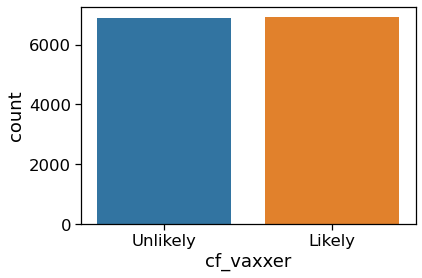

In [20]:
# Checking that the data is balance
import warnings 
warnings.simplefilter(action="ignore", category=FutureWarning) #If you know that the warning is not affecting your code is good practice to ignore this warnings

print("Values 1 or Likely =", (y_train_balance == 1).sum())
print("\nValues 0 or Unlikely =",(y_train_balance == 0).sum())
ax = sns.countplot(y_train_balance["cf_vaxxer"]) #We use the sns countplot to display the values inside the variable
ax.xaxis.set_ticklabels(['Unlikely','Likely'])
plt.show()

---

### Model initialisation, model fitting, and model validation using the train data
* Initialise many [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifiers by varying the `n_neighbors` parameter between 1 and 20 and fit on the training set. Import the function [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and perform 5-fold cross-validation to evaluate the twenty models using the accuracy score. You can use the same procedure we used to find the best number of _k_ clusters in the lab on _k_-mean clustering. 
* Repeat the procedure but this time set the parameter `weights` in the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) estimator to `distance` so that closer neighbours of a query point will have a greater influence than distant neighbours.

In [21]:
# Run the k-means algorithm for values of k between 1 and 20
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

K = range(1,21) # range with a starting point 1 and endpoint 21 
for k in K: # a for loop iterating over values of k ranging from 1 to 20
    kNN_Classifier =  KNeighborsClassifier(n_neighbors = k) # Each iteration will add 1 neighbour # Create an instance of k-nearest neighbors (k-NN) classifier.
    kNN_Classifier.fit(X_train_balance, y_train_balance.cf_vaxxer)
    kNN_score = cross_val_score(kNN_Classifier, X_train_balance, y_train_balance.cf_vaxxer, cv=5, scoring='accuracy')
# Take the mean across the five accuracy scores
    print("Accuracy by n_neigbours:", k ,"=", kNN_score.mean()*100)

Accuracy by n_neigbours: 1 = 71.09801784887347
Accuracy by n_neigbours: 2 = 70.95303014935911
Accuracy by n_neigbours: 3 = 68.88244970848099
Accuracy by n_neigbours: 4 = 69.64254555451512
Accuracy by n_neigbours: 5 = 67.23151932946563
Accuracy by n_neigbours: 6 = 67.12288141922996
Accuracy by n_neigbours: 7 = 65.32728569283302
Accuracy by n_neigbours: 8 = 65.93542002613934
Accuracy by n_neigbours: 9 = 65.32728831358206
Accuracy by n_neigbours: 10 = 65.94267688024986
Accuracy by n_neigbours: 11 = 65.50822220702187
Accuracy by n_neigbours: 12 = 65.55897039156349
Accuracy by n_neigbours: 13 = 65.26936189740134
Accuracy by n_neigbours: 14 = 65.28384415663379
Accuracy by n_neigbours: 15 = 65.21862681660495
Accuracy by n_neigbours: 16 = 65.44310445545682
Accuracy by n_neigbours: 17 = 65.29103549201812
Accuracy by n_neigbours: 18 = 65.35616372657935
Accuracy by n_neigbours: 19 = 64.88553747500788
Accuracy by n_neigbours: 20 = 65.05212800891474


In [22]:
# Run the k-means algorithm for values of k between 1 and 20
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNN_scores_graph = [] # Initialise a list to store the distances

K = range(1,21) # range with a starting point 1 and endpoint 21 
for k in K: # a for loop iterating over values of k ranging from 1 to 20
    kNN_Classifier =  KNeighborsClassifier(n_neighbors = k, weights = "distance") # Each iteration will add 1 neighbour # weights was change to distance where weight points by the inverse of their distance
    kNN_Classifier.fit(X_train_balance, y_train_balance.cf_vaxxer)
    kNN_score = cross_val_score(kNN_Classifier, X_train_balance, y_train_balance.cf_vaxxer, cv=5, scoring='accuracy') # Evaluate the kNN_Classifier model via 5-fold cross-validation
    KNN_scores_graph.append(kNN_score.mean()*100)
    # Take the mean across the five accuracy scores
    print("Accuracy by n_neigbours:", k ,"=", kNN_score.mean()*100)

Accuracy by n_neigbours: 1 = 71.09801784887347
Accuracy by n_neigbours: 2 = 71.64094008364906
Accuracy by n_neigbours: 3 = 70.85908677902866
Accuracy by n_neigbours: 4 = 71.75680077825763
Accuracy by n_neigbours: 5 = 70.76493112802542
Accuracy by n_neigbours: 6 = 70.97482429843204
Accuracy by n_neigbours: 7 = 70.62733394082295
Accuracy by n_neigbours: 8 = 70.7648341603107
Accuracy by n_neigbours: 9 = 70.51866458159873
Accuracy by n_neigbours: 10 = 70.69243334714469
Accuracy by n_neigbours: 11 = 70.61279140436245
Accuracy by n_neigbours: 12 = 70.77934000628454
Accuracy by n_neigbours: 13 = 70.81553255062042
Accuracy by n_neigbours: 14 = 70.96036562594101
Accuracy by n_neigbours: 15 = 70.90244445125839
Accuracy by n_neigbours: 16 = 71.02550696424747
Accuracy by n_neigbours: 17 = 71.1775313749524
Accuracy by n_neigbours: 18 = 71.0037495056612
Accuracy by n_neigbours: 19 = 70.96755696132536
Accuracy by n_neigbours: 20 = 71.06170737083049


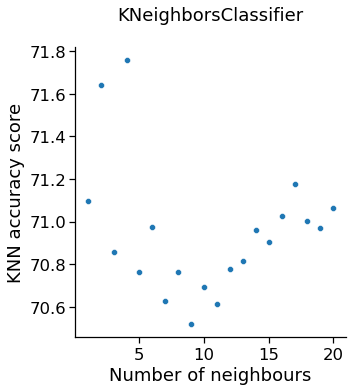

In [23]:
# Generate the plot using the y as the accuracy scores and the x as the number of neighbours
grid = sns.relplot(x= K, y = KNN_scores_graph).set(title='KNeighborsClassifier\n') 

# Add x and y labels
grid.set(xlabel='Number of neighbours', ylabel='KNN accuracy score')

In [36]:
# We set the hyperparameter n_neighbors=4 meaning that the label of an unknown respondent (0 or 1) is a function of the labels of its four closest training respondents.
kNN_Classifier_Covid =  KNeighborsClassifier(n_neighbors = 4, weights = "distance")

# Fit both models to the training data
kNN_Classifier_Covid.fit(X_train_balance, y_train_balance.cf_vaxxer)

# Evaluate the kNN_Classifier model via 5-fold cross-validation
kNN_score = cross_val_score(kNN_Classifier_Covid, X_train_balance, y_train_balance.cf_vaxxer, cv=5, scoring='accuracy')
# Take the mean across the five accuracy scores
kNN_score.mean()*100

71.75680077825763

In [25]:
# Logistic Regression Classifier to make a comparisson with other classifier
from sklearn.linear_model import LogisticRegression

LogReg_Classifier_Covid =  LogisticRegression(random_state=0) # Random state is used for replicability

LogReg_Classifier_Covid.fit(X_train_balance, y_train_balance.cf_vaxxer)

# Repeat for our logistic regression model
LogReg_score = cross_val_score(LogReg_Classifier_Covid, X_train_balance, y_train_balance.cf_vaxxer, cv=5, scoring='accuracy')
LogReg_score.mean()*100

63.40143087656456

### Classifier and model decision

It was used two types of classifier `Logistic Regression` and `KNeighbors Classifier` in our train data and was decided to choose the KneighborClassifier as it have a higher accuracy and differences of ~10%. In the graph above of KNeighbors Classifier was illustrated the KNN accuracy score by Number of neighbours. Weights was change to distance where weight points by the inverse of their `distance` which gave better results compared to `uniform`. We can see that `4` number of neighbours have the higher accuracy score of `71.75`.

---

### Preprocessing the test data set
Preprocess your test data using the same approach you used to preprocess the training data set.

In [26]:
# Respondent sex categorical variable into 3 dummy/indicator variables
# Respondent at risk of serious illness from Covid-19 variable into 3 dummy/indicator variables
X_test_predictors = pd.get_dummies(X_test, columns=["cf_sex_cv","cf_clinvuln_dv"])

# Create two DataFrames, one for quantitative variables and one for qualitative variables
X_test_predictors_cat = X_test_predictors[['cf_sex_cv_1', 'cf_sex_cv_2', 'cf_sex_cv_3',
                                          "cf_clinvuln_dv_0.0","cf_clinvuln_dv_1.0","cf_clinvuln_dv_2.0"]]
X_test_predictors_cont = X_test_predictors[['cf_age', 'cf_scsf1', "cf_nbrcoh3"]]

# Standardise the predictors using the StandardScaler function in sklearn
scaler = StandardScaler() # Initialising the scaler using the default arguments 
X_test_predictors_cont_scale = scaler.fit_transform(X_test_predictors_cont) # Fit to continuous input variables and return the standardised dataset 

# Use the concatenate function in Numpy to combine all variables — both categorical and continuous predictors — in one array
X_test_preprocessed = np.concatenate([X_test_predictors_cont_scale,X_test_predictors_cat], axis = 1)
X_test_preprocessed

array([[ 1.7716949 ,  0.49987547, -1.53476705, ...,  0.        ,
         1.        ,  0.        ],
       [-0.91917431, -0.57378343, -0.28779108, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.70786289,  0.49987547, -1.53476705, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.23206608,  0.49987547,  0.95918488, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.02200832,  1.57353436,  0.95918488, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.33239276,  0.49987547, -1.53476705, ...,  1.        ,
         0.        ,  0.        ]])

In [27]:
from sklearn.metrics import accuracy_score
# Evaluate performance using the accuracy score for the  k-nearest neighbors model
y_pred_kNN = kNN_Classifier_Covid.predict(X_test_preprocessed)
accuracy_score(y_test, y_pred_kNN)*100

61.753784632962

---

### Predict who is likely or not to take up a Covid-19 vaccine 

* Use the model with the highest accuracy to predict unseen observations in the test data. The aim is to predict people who would take up or not a Covid-19 vaccine based on social and health features.
* Describe the performance of your classification model on the test data by  reporting the model accuracy score and the confusion matrix. 
* Briefly interpret your results: 
  * What is the accuracy of your prediction of vaccination likelihood? 
  * Report and interpret the values from the confusion matrix, including true positives, false positives, true negatives, and false negatives. Which scores are of interest for your analysis, those related to the positive class (likely to vaccinate) or negative class (unlikely to vaccinate)? Why?   
  * In an event that the NHS plans an information campaign among people who are unlikely to vaccinate, which scores in the confusion matrix would be more important to evaluate the performance of your model? 
  * What would you change in order to improve the predictive accuracy of your classification model?

Accuracy Score : 0.61753784632962

Report : 
               precision    recall  f1-score   support

         0.0       0.19      0.46      0.27       532
         1.0       0.87      0.65      0.74      2969

    accuracy                           0.62      3501
   macro avg       0.53      0.55      0.50      3501
weighted avg       0.77      0.62      0.67      3501



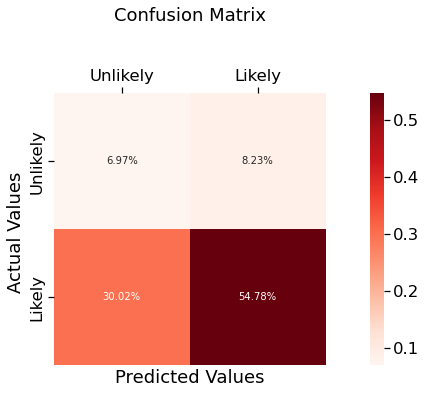

Accuracy:
62%


 Predicted   0.0   1.0   All
Actual                     
0.0         244   288   532
1.0        1051  1918  2969
All        1295  2206  3501

 
True negative =  244 
False positive =  288 
False negative =  1051 
True positive =  1918 




<Figure size 432x288 with 0 Axes>

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Predict y value for test dataset
y_predict = kNN_Classifier_Covid.predict(X_test_preprocessed)
accuracy = accuracy_score(y_test, y_predict)
cf_matrix = confusion_matrix(y_test, y_predict)
report = classification_report(y_test, y_predict)

#printing the results
print ('Accuracy Score :',accuracy)
print ('\nReport : \n', report)

## Display the visualization of the Confusion Matrix.
plt.figure(figsize = (16,5))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt = '.2%', cmap='Reds',square=True)
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['Unlikely','Likely'])
ax.yaxis.set_ticklabels(['Unlikely','Likely'])
ax.xaxis.tick_top()
plt.show()
plt.savefig("Confusion Matrix")

#Accuracy of Text classification
print("Accuracy:")
print(f"{accuracy:.0%}")

# Confusion matrix for the k-nearest neighbors model plotted via pandas function crosstab
print("\n\n", pd.crosstab(y_test.cf_vaxxer,y_pred_kNN, rownames=['Actual'], colnames=['Predicted'], margins=True))

# The function ravel() flattens the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_kNN).ravel()
print("\n",'\nTrue negative = ', tn, '\nFalse positive = ', fp, '\nFalse negative = ', fn, '\nTrue positive = ', tp,"\n\n")

### Results

In this analysis we used social and health variables to predict the a person likelihood of Covid-19 vaccination. The predicting variables to make the study were _sex_, _general health_, _age_, _clinically vulnerable for Covid-19_ and _people can be trusted in your neighbourd_ and the outcome varible was _likelihood of taking Covid-19 vaccination_. 

To study the influence of the feature variables was used a k-nearest neighbors model as it provided a higher accuracy score compared to other models like logistic regression. The confusion matrix above shows that the k-NN model predicts 244 out of 532 respondents who are _unlikely_ to vaccinate which correspond to  6.97% of all values. Also, shows that 1918 out of 2969 respondents who are _likely_ to vaccinate which correspond to 54.78% of all values.

The model choosed to predict unseen observation in the test data set fail to predicts well the respondents as there is not a high accuracy score (62%). The feature used to explain if a person likelihood of taking a Covid-19 vaccination shows:

| |Precision|Recall|F1-score| Distribution|
| ---| ---| ---| ---| ---|
|Unlikely| 0.19| 0.46| 0.27| 532|
|Likely| 0.87| 0.65| 0.74| 2969|

* The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
* The recall is intuitively the ability of the classifier to find all the positive samples.
* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The main interest of this analysis was to prediciti the minority class or unlikely to vaccine to run a successfull information campaing for the NHS. It was found that our model it provide a lower precision of 0.19 for unlikely to vaccinate meaning that the model can only predict __19%__ of people that are unlikely to vaccinate. Contrastingly, the model shows a higher precision of 0.87 for likely to vaccinate meaning that the model can predict __87%__ of people that are likely to take the vaccine. This indicate that our model is far from optimal specially considering that our plan was to predict the people who are unlikey to vaccinate.

Overall, it appears that our KNN neighbours model was not a good predictor for people who are unlikely to vaccine and if the NHS plans to run an information based in the people that is unlikely to vaccine will not be very accurate.

---

### Further Improvements

In order to find a better model we could only use more strong features that are more likely to be associated to the people who are unlikely to vaccinate like for example `Mistrust of science`. Another reasons could be reject socio-demographic as peoples believe and inclinations seems to play a better role that actually socio-demographic values. 

However, when used the data was balanced in the continuos variables as there were more negative than positive reviews. So a rebalance would be needed to improve the model and the power of the classiffier and may need more data in order to adjust the balance.

---

### __References__

**[Reproducible Data Science with Open-Source Python Tools and Real-World Data](https://valdanchev.github.io/reproducible-data-science-python)** by Valentin Danchev

**[Supervised Learning with scikit-learn](https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn)** by DataCamp

**[sklearn.neighbors.KNeighborsClassifier¶](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)** by Scikit Learn

**[sklearn.metrics.precision_recall_fscore_support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)** by Scikit Learn

**[Hyperparameters and Model Validation in Python Data Science Handbook ](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)** by Jake VanderPlas

**[Overview of Classification Methods in Python with Scikit-Learn](https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/)** by Dan Nelson